In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [3]:
df = pd.read_csv('knapPI_1_1000_1000.csv', delimiter=';')

In [4]:
df

,knapsack capacity,5002
0,94,485
1,506,326
2,416,248
3,992,421
4,649,322
...,...,...
995,949,336
996,89,931
997,488,588
998,568,449


In [55]:
z_a = np.max(df['knapsack capacity'])
p = df['knapsack capacity'].to_numpy()
w = df['5002'].to_numpy()

In [56]:
c = p/w
el = list(zip(p,w,c))
el.sort(key = lambda a:a[2], reverse = True)
p, w,_ = zip(*el)

In [57]:
def greedy(set_j,C):
    w_ = 0
    z_g = 0
    x = np.zeros(1000)
    for i in set_j:
        if w_+w[i]<=C:
            x[i] = 1
            w_ +=w[i]
            z_g +=p[i]
    return z_g


In [62]:
def max_from_set(set_):
    max_ = -1000
    for j in set_:
        if p[j] > max_:
            max_ = p[j]
    return max_

In [66]:
z_a = np.max(df['knapsack capacity'])
for i in tqdm(range(1000)):
    for j in range(1000):
        if w[i]+w[j]<=5002:
            min_ = np.min([p[i],p[j]])
            set_ = set()
            for l in range(1000):
                if l!=i and l!=j and p[l]<=min_:
                    set_.add(l)
            z_g = greedy(set_,5002 - w[i] - w[j])
            z_mg = np.max([z_g, max_from_set(set_)])
            
            if p[i]+p[j]+z_mg > z_a:
                z_a = p[i] + p[j] + z_mg

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:57<00:00,  1.52it/s]


In [67]:
z_a

55290

Лаба 7

In [34]:
a = np.array([[0,1,1,0,0,0],[0,0,0,1,0,0],[0,0,0,1,1,0],[0,0,0,0,0,1],[0,0,0,0,0,1],[0,0,0,0,0,0]])
p = np.array([2,3,4,1,8,3])


In [36]:
n = len(p)
N = np.zeros(n)
for i in range(n):
    for j in range(n):
        N[i]+=a[i,j]
        
s = set(range(n))
P = np.sum(p)
schedule = np.zeros(n)
for i in range(n-1,-1, -1):
    j = np.argwhere(N == 0)[0,0]
    s.remove(j)
    N[j] = np.inf
    schedule[i] = j
    P -=p[j]
    for k in range(n):
        if a[k,j] == 1:
            N[k]-=1
    
print(schedule+1)

[1. 3. 5. 2. 4. 6.]


Лаба 9 |I| = 20, |J|=100

In [ ]:
c = [35,47,47,38,37,41,48,45,29,27,24,21,20,41,25,47,40,48,48,50]

In [77]:
a = np.zeros((20,100))
with open('setcover.txt') as f:
    for i in range (20):
        line = f.readline().replace('\n','')
        strings = line.split('\t')
        for index, el in enumerate(strings):
            a[i,index] = int(el)  

In [78]:
a

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
x = set()
j = set()
j_k = set()
k = 0
I = set(range(20))
while len(j)!=100:
    j_k =
    min_= np.inf
    i_0 = 0
    for i in I.difference(x):
        if np.any(a[i] == 1) and min_> c[i]/(a[i].sum()) :
            i_0 = i
            min_ = c[i]/(a[i].sum())
            
    k+=1
    X.add(i_0)
    j = j.union(j_k)
    
            
        
    

Лаба 8

In [20]:
def f2cmax(p):
    L = []
    R = []
    n = p.shape[0]
    X = set(range(n))
    while len(X)!= 0 :
        min_ = np.inf
        i_0 = 0
        j_0 = 0
        for i in X:
            for j in range(2):
                if p[i,j] <= min_:
                    min_ = p[i,j]
                    i_0, j_0 = i,j
                    
        if j_0 == 0:
            L.append(i_0)
        else:
            R.insert(0,i_0)
        X.remove(i_0)
        
        
    return L + R
        
                    


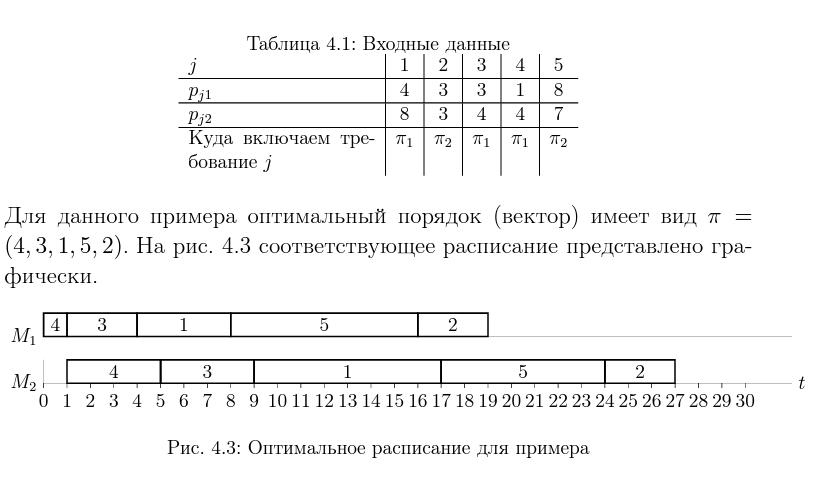

In [21]:
p = np.array([[4,8],[3,3],[3,4],[1,4],[8,7]])
n = 5
sol = f2cmax(p)
for t in range(2):
    for i in range(n):
        print(sol[i]+1, end = ' ')
    print('\n')


4 3 1 5 2 

4 3 1 5 2 



Лаба 4
|K| = 5, |J| = 50

In [22]:
q_k = [100,300,400,200,100]
ro_j = [1,10,2,6,1,2,9,1,10,6,6,5,7,2,4,2,9,4,6,8,1,2,8,1,5,6,6,4,2,5,5,8,5,7,6,8,4,3,9,4,9,2,8,3,10,6,1,9,6]
inc_mat = np.zeros((50,50))
inc_mat[0,2]=1
inc_mat[2,6]=1
inc_mat[4,6]=1
inc_mat[6,3]=1
inc_mat[3,7]=1
inc_mat[7,24] = 1
inc_mat[24,19] = 1
inc_mat[17,18]=1
inc_mat[18,19]=1
inc_mat[20,24]=1
inc_mat[25,19]=1
inc_mat[29,25]=1
inc_mat[19,32]=1
inc_mat[32,38]=1
inc_mat[36,33]=1
inc_mat[34,33]=1
inc_mat[33,38]=1
inc_mat[38,37]=1
inc_mat[37,42]=1
inc_mat[42,45]=1
inc_mat[45,49]=1
inc_mat[47,44]=1
inc_mat[46,44]=1
inc_mat[44,43]=1
inc_mat[43,49]=1

In [27]:
r_jk = np.zeros((50,5))
with open('resourse.txt') as f:
    for i in range (50):
        line = f.readline().replace('\n','')
        strings = line.split('\t')
        for index, el in enumerate(strings):
            r_jk[i,index] = int(el) 

In [28]:
r_jk

array([[  0., 177.,   0., 120.,   0.],
       [  0.,  85., 129.,  84.,  55.],
       [ 27.,  51.,   0.,   0.,   0.],
       [  0.,   0.,  36.,   0.,   0.],
       [ 42.,   0., 226.,   0.,   0.],
       [  0., 115.,   0.,   0.,   0.],
       [ 52., 163., 172.,  33.,   0.],
       [  0.,   0., 214.,  70.,   0.],
       [ 42.,   0.,   0.,   0.,  46.],
       [  0.,   0., 176., 107.,   0.],
       [  0., 163.,   0.,   0.,   0.],
       [ 20., 164., 201.,  48.,  48.],
       [ 17.,   0.,   0.,   0.,   0.],
       [  0., 166.,   0., 114.,   0.],
       [  0., 106.,   0.,   0.,   0.],
       [  8.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  55.],
       [ 41.,   0., 141.,   0.,   0.],
       [  0.,  29., 118.,  84.,  29.],
       [  6.,   0., 145.,   0.,  22.],
       [  0.,   0.,  32.,   0.,   0.],
       [ 22., 165.,   0.,  98.,   0.],
       [ 24.,   0., 223.,   0.,   0.],
       [ 51.,   0.,   0., 111.,   0.],
       [ 56.,   0., 142.,   0.,   0.],
       [ 46.,   0.,   0.,

In [ ]:
t = []
t[0] = 0
C = []
C[0] = set()
A = []
A[0] = set()
l = 0
while len(C[t[0]].union(A[t[0]])) < 50:
    l+=1
    for j in A[t[l-1]]:
        t[l] = min([s[j] + ro_j[j]])
        
    

Лаба 2

In [59]:
bin_size = 100
with open('binpack.txt','r') as f:
    binpack = f.read()
    
binpack = binpack.split('\n')

In [60]:
binpack = binpack[1:]

In [61]:
for i in range(len(binpack)):
    binpack[i] = float(binpack[i])


**Online**

Next fit

In [62]:
def next_fit(current_flow: float, current_container: float, max_size: float):
    if current_container + current_flow > max_size:
        return False #close container, return counter#
    else:
        return True

In [63]:
def NF_flow(all_flow: list, max_size: float):
    container_counter = 1
    current_container = 0
    for prod in all_flow:
        if next_fit(prod, current_container, max_size):
            current_container += prod
        else:
            # print(current_container)
            container_counter+=1
            current_container = prod
    return container_counter

In [64]:
np.random.shuffle(binpack)
NF_flow(binpack,bin_size)

208

First fit

In [46]:
def first_fit(current_flow: float, current_containers: list, max_size: float):
    for i in range(len(current_containers)):
        if current_containers[i] + current_flow < max_size:
            current_containers[i] += current_flow
            return current_containers
    return current_containers + [current_flow]

In [47]:
def FF_flow(all_flow: list, max_size: int):
    current_containers = [0]
    for prod in all_flow:
        current_containers = first_fit(prod, current_containers, max_size)
    return len(current_containers)

In [65]:
FF_flow(binpack,bin_size)

190

**Offline**

 Next-fit-decreasing

In [67]:
def next_fit_decreasing(all_flow: list, max_size: float):
    all_flow = sorted(all_flow,reverse=True)
    return NF_flow(all_flow, max_size)

In [68]:
next_fit_decreasing(binpack, bin_size)

202

In [69]:
def Modified_first_fit_decreasing(all_flow: list, max_size: float):
    large_flow = []
    medium_flow = []
    small_flow = []
    v_small_flow = []
    for prod in all_flow:
        if prod > max_size / 2:
            large_flow.append(prod)
        elif prod > max_size / 3:
            medium_flow.append(prod)
        elif prod > max_size / 6:
            small_flow.append(prod)
        else:
            v_small_flow.append(prod)
            
    all_flow = large_flow + medium_flow + small_flow + v_small_flow
    return FF_flow(all_flow, max_size)

In [70]:
Modified_first_fit_decreasing(binpack,bin_size + 10e-16)

198

In [73]:
import math

In [76]:
def Martello_Toth(all_flow: list,alpha: float, max_size: float):
    L_1 = []
    L_2 = []
    L_3 = []
    all_flow_percent = np.array(all_flow) / max_size
    for i in range(len(all_flow_percent)):
        if all_flow_percent[i] > 1 - alpha:
            L_1.append(i)
        elif all_flow_percent[i] > 1/2 and all_flow_percent[i] <= 1 - alpha:
            L_2.append(i)
        elif all_flow_percent[i] >= alpha and all_flow_percent[i] <= 1/2:
            L_3.append(i)
    H_1 = len(L_1) + len(L_2) + max(0,np.ceil(sum([all_flow_percent[i] for i in L_3]) - (len(L_2) - sum([all_flow_percent[i] for i in L_2]))))
    summ_L_2 = 0
    for i in L_2:
        summ_L_2 += math.floor((1 - all_flow_percent[i]) / alpha)
        
    H_2 = len(L_1) + len(L_2) + max(0, np.ceil((len(L_3) - summ_L_2) / math.floor(1 / alpha)))
    return max([H_1,H_2])
    

In [77]:
[Martello_Toth(binpack, i, bin_size) for i in  np.linspace(0,1/2,11)[1:-1]]

[167.0, 167.0, 167.0, 167.0, 167.0, 101.0, 93.0, 58.0, 31.0]